Sources : https://analyticsindiamag.com/guide-to-multi-class-classification/

https://colab.research.google.com/drive/19dQTVjbjhKQoqVj0v4x34fNTpc0co5cf?usp=sharing#scrollTo=pZug4ZF56w5e

https://stackoverflow.com/questions/33547965/computing-auc-and-roc-curve-from-multi-class-data-in-scikit-learn-sklearn

https://www.kaggle.com/willkoehrsen/intro-to-model-tuning-grid-and-random-search

https://towardsdatascience.com/how-to-check-if-a-classification-model-is-overfitted-using-scikit-learn-148b6b19af8b

# Anomaly Detection using Unsupervised Techniques

Anomaly detection is the identification of data points, items, observations or events that do not conform to the expected pattern of a given group. These anomalies occur very infrequently but may signify a large and significant threat such as cyber intrusions or fraud. Anomaly detection is heavily used in behavioral analysis and other forms of analysis in order to aid in learning about the detection, identification and prediction of the occurrence of these anomalies.

### Importing the data

2. [Extracting Median and EDA](#Extracting_Median_and_EDA)

3. [Extracting_Minimum](#Extracting_Minimum)

4. [Extracting_Maximum](#Extracting_Maximum)

5. [Extracting_Variance](#Extracting_Variance)

6. [Extracting_std](#Extracting_std)

7. [Extracting_ptp](#Extracting_ptp)

8. [Extracting_iqr](#Extracting_iqr)

9. [Stable_Flag_Classification](#Stable_Flag_Classification)

    9a. [Building_an_Logistic_Regression_classifier](#Building_an_Logistic_Regression_classifier)
    
    9b. [Building_a_RF_classifier](#Building_a_RF_classifier)
    
    9c. [Building_a_Decision_Tree_classifier](#Building_a_Decision_Tree_classifier)
    
    9d. [Building_a_SVM_classifier](#Building_a_SVM_classifier)
    
    9e. [Building_a_kNN_classifier](#Building_a_kNN_classifier)
    
    
10. [Classification_models_for_Cooler_failure](#Classification_models_for_Cooler_failure)

    10a. [Logistic regression using One vs All](#Logistic_regression_using_One_vs_All)
    
    10b. [SVM for cooler failure classification](#SVM_for_cooler_failure_classification.)
    
    10c. [DT_for_cooler_failure_classification](#DT_for_cooler_failure_classification.)
    
    10d. [kNN_for_cooler_failure_classification](#kNN_for_cooler_failure_classification.)
    
    10e. [RF_for_cooler_failure_classification](#RF_for_cooler_failure_classification.)

Inducing noise : https://stackoverflow.com/questions/46093073/adding-gaussian-noise-to-a-dataset-of-floating-points-and-save-it-python

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
## importing the data
## pressure sensors are imported as PS. There are around 6 pressure sensors. They are named as ps1, ps2, ps3, ps4, ps5, ps6. 

df_ps1 = pd.read_csv('PS1.txt', delimiter = '\t', header = None)
df_ps2 = pd.read_csv('PS2.txt', delimiter = '\t', header = None)
df_ps3 = pd.read_csv('PS3.txt', delimiter = '\t', header = None)
df_ps4 = pd.read_csv('PS4.txt', delimiter = '\t', header = None)
df_ps5 = pd.read_csv('PS5.txt', delimiter = '\t', header = None)
df_ps6 = pd.read_csv('PS6.txt', delimiter = '\t', header = None)


In [3]:
## cooling efficiency and cooling power are imported as ce and cp respectively. 

df_ce = pd.read_csv('CE.txt',delimiter = '\t', header = None)
df_cp = pd.read_csv('CP.txt', delimiter = '\t', header = None)


In [4]:
# temperature sensors are imported as ts. There are around 4 pressure sensors. They are named as ts1, ts2, ts3, ts4.

df_ts1 = pd.read_csv('TS1.txt', delimiter = '\t', header = None)
df_ts2 = pd.read_csv('TS2.txt', delimiter = '\t', header = None)
df_ts3 = pd.read_csv('TS3.txt', delimiter = '\t', header = None)
df_ts4 = pd.read_csv('TS4.txt', delimiter = '\t', header = None)


In [5]:
# flow sensors are imported as fs. There are around 2 pressure sensors. They are named as fs1, fs2.

df_fs1 = pd.read_csv('FS1.txt', delimiter = '\t', header = None)
df_fs2 = pd.read_csv('FS2.txt', delimiter = '\t', header = None)


In [6]:
# motor power sensors is imported as eps. 
# vibration sensors is imported as vs
# efficiency power is imported as se

df_eps1 = pd.read_csv('EPS1.txt', delimiter = '\t', header = None)
df_se = pd.read_csv('SE.txt', delimiter = '\t', header = None)
df_vs1 = pd.read_csv('VS1.txt', delimiter = '\t', header = None)



In [7]:
## function for defining variables like ps1_1, ps1_2 for 17 sensors with different sampling rates

def col(n, var):
    l = []
    for i in range(1,n):
        temp = str(var) + '_' + '%d' %i
        l.append(temp)
    return l


In [8]:
# 
df_ps1.columns = col(6001,'ps1')
df_ps2.columns = col(6001,'ps2')
df_ps3.columns = col(6001,'ps3')
df_ps4.columns = col(6001,'ps4')
df_ps5.columns = col(6001,'ps5')
df_ps6.columns = col(6001,'ps6')




In [9]:
df_ts1.columns = col(61,'ts1')
df_ts2.columns = col(61,'ts2')
df_ts3.columns = col(61,'ts3')
df_ts4.columns = col(61,'ts4')


In [10]:
df_eps1.columns = col(6001,'eps1')

In [11]:
df_fs1.columns = col(601,'fs1')
df_fs2.columns = col(601,'fs2')

In [12]:
df_vs1.columns = col(61,'vs1')

In [13]:
df_ce.columns = col(61,'ce')

In [14]:
df_cp.columns = col(61,'cp')

In [15]:
df_se.columns = col(61,'se')

In [16]:
df_ps = pd.concat([df_ps1, df_ps2, df_ps3, df_ps4, df_ps5, df_ps6], axis = 1)
df_ts = pd.concat([df_ts1, df_ts2, df_ts3, df_ts4], axis = 1)
df_fs = pd.concat([df_fs1, df_fs2], axis = 1)
df_vir = pd.concat([df_cp, df_ce, df_eps1, df_se, df_vs1], axis = 1)


In [17]:
df = pd.concat([df_ps, df_ts, df_fs, df_vir], axis = 1)
df.head()

,ps1_1,ps1_2,ps1_3,ps1_4,ps1_5,ps1_6,ps1_7,ps1_8,ps1_9,ps1_10,...,vs1_51,vs1_52,vs1_53,vs1_54,vs1_55,vs1_56,vs1_57,vs1_58,vs1_59,vs1_60
0,151.47,151.45,151.52,151.27,150.80,150.69,153.89,154.67,152.88,153.82,...,0.554,0.552,0.545,0.553,0.553,0.539,0.544,0.545,0.535,0.543
1,151.11,151.12,151.16,150.92,150.70,150.62,152.40,153.21,152.81,153.53,...,0.555,0.547,0.548,0.544,0.536,0.542,0.540,0.533,0.531,0.534
2,150.81,150.79,150.84,150.65,150.35,150.23,152.03,152.81,152.44,153.27,...,0.543,0.544,0.543,0.554,0.544,0.544,0.545,0.544,0.530,0.534
3,150.48,150.47,150.52,150.31,150.04,149.98,151.63,152.48,152.24,152.94,...,0.549,0.538,0.553,0.543,0.553,0.555,0.544,0.543,0.543,0.542
4,150.41,150.35,150.24,150.12,149.87,149.71,151.64,152.37,151.78,152.68,...,0.546,0.546,0.544,0.552,0.539,0.540,0.549,0.542,0.533,0.537


In [18]:
profile = pd.read_csv('profile.txt', delimiter = '\t', header = None)
profile.columns = ["Cooler Condition","Valve Condition","Internal Pump Leakage","Hydraulic Accumulator","Stable Flag"]

# Statistical features

<a id = 'Extracting_Median_and_EDA'></a>

## Extracting Mean

In [19]:
def mean_conversion(df):
    df1 = pd.DataFrame()
    df1 = df.mean(axis=1) ## AVERAGE ALONG THE ROW
    return df1

In [20]:
PS1_mean = pd.DataFrame(mean_conversion(df_ps1))
PS1_mean.columns = ['PS1_mean']

PS2_mean = pd.DataFrame(mean_conversion(df_ps2))
PS2_mean.columns = ['PS2_mean']

PS3_mean = pd.DataFrame(mean_conversion(df_ps3))
PS3_mean.columns = ['PS3_mean']

PS4_mean = pd.DataFrame(mean_conversion(df_ps4))
PS4_mean.columns = ['PS4_mean']

PS5_mean = pd.DataFrame(mean_conversion(df_ps5))
PS5_mean.columns = ['PS5_mean']

PS6_mean = pd.DataFrame(mean_conversion(df_ps6))
PS6_mean.columns = ['PS6_mean']

TS1_mean = pd.DataFrame(mean_conversion(df_ts1))
TS1_mean.columns = ['TS1_mean']

TS2_mean = pd.DataFrame(mean_conversion(df_ts2))
TS2_mean.columns = ['TS2_mean']

TS3_mean = pd.DataFrame(mean_conversion(df_ts3))
TS3_mean.columns = ['TS3_mean']

TS4_mean = pd.DataFrame(mean_conversion(df_ts4))
TS4_mean.columns = ['TS4_mean']

FS1_mean = pd.DataFrame(mean_conversion(df_fs1))
FS1_mean.columns = ['FS1_mean']

FS2_mean = pd.DataFrame(mean_conversion(df_fs2))
FS2_mean.columns = ['FS2_mean']

P1_mean = pd.DataFrame(mean_conversion(df_eps1))
P1_mean.columns = ['P1_mean']

VS1_mean = pd.DataFrame(mean_conversion(df_vs1))
VS1_mean.columns = ['VS1_mean']

CE1_mean = pd.DataFrame(mean_conversion(df_ce))
CE1_mean.columns = ['CE1_mean']

CP1_mean = pd.DataFrame(mean_conversion(df_cp))
CP1_mean.columns = ['CP1_mean']

SE1_mean = pd.DataFrame(mean_conversion(df_se))
SE1_mean.columns = ['SE1_mean']

In [21]:
Mean = pd.concat([PS1_mean,PS2_mean,PS3_mean,PS4_mean,PS5_mean,PS6_mean,
                    TS1_mean,TS2_mean,TS3_mean,TS4_mean,FS1_mean,FS2_mean,
                    P1_mean,VS1_mean,CE1_mean,CP1_mean,SE1_mean],axis = 1)

In [22]:
profile_stable = profile['Stable Flag']

In [23]:
Mean_target = pd.concat([Mean, profile_stable], axis = 1)

In [24]:
Mean_target1 = Mean_target[Mean_target['Stable Flag'] == 1].drop(labels='Stable Flag', axis=1)

In [25]:
Mean_target0 = Mean_target[Mean_target['Stable Flag'] == 0].drop(labels='Stable Flag', axis=1)

In [26]:
#pip install pyod

In [27]:
#for modeling
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

lof = LocalOutlierFactor(n_neighbors=20, contamination=.03)

## Standardisation of Data

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler() ## x-mean/std

X_scaled = scaler.fit_transform(Mean)


In [30]:
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = Mean.columns

In [31]:
X_scaled_target = pd.concat([X_scaled, profile['Stable Flag']], axis = 1)

In [32]:
X_scaled.columns 

Index(['PS1_mean', 'PS2_mean', 'PS3_mean', 'PS4_mean', 'PS5_mean', 'PS6_mean',
       'TS1_mean', 'TS2_mean', 'TS3_mean', 'TS4_mean', 'FS1_mean', 'FS2_mean',
       'P1_mean', 'VS1_mean', 'CE1_mean', 'CP1_mean', 'SE1_mean'],
      dtype='object')

In [33]:
X_scaled_ps = pd.concat([PS1_mean,PS2_mean,PS3_mean, PS4_mean, PS5_mean, PS6_mean], axis = 1)

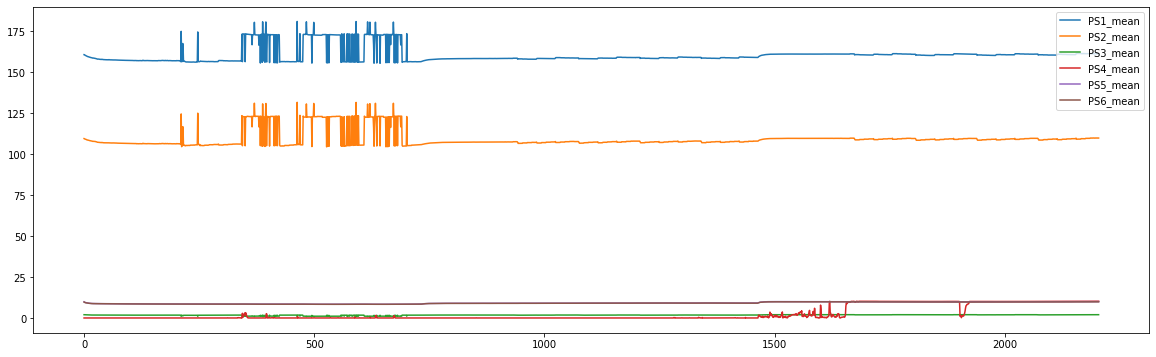

In [34]:
X_scaled_ps.plot(figsize = (20,6))

In [35]:
# print(X_train_scaled.shape)
# print(X_test_scaled.shape)

## Hopkins 

In [36]:
## Hopkins statistics is used to determine if there are any patterns in the given dataframe. 
## A value of above 65-70 is considered as a good hopkins and the dataset can be clustered. 

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [37]:
hopkins(X_scaled)

0.9846274810253559

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2).fit(X_scaled)
print(kmeans)

KMeans(n_clusters=2)


In [39]:
center = kmeans.cluster_centers_
print(center)

[[-0.0363942   0.01331362 -0.43300827 -0.60085404 -0.64073964 -0.64106216
   0.60283448  0.60439605  0.60000342  0.61230083 -0.18960133 -0.58165504
  -0.36785709  0.53670875 -0.68397393 -0.6464846  -0.13491003]
 [ 0.07161281 -0.0261972   0.85202974  1.1822996   1.26078244  1.26141707
  -1.18619651 -1.18926922 -1.18062584 -1.20482344  0.37307825  1.14452176
   0.72383184 -1.05608102  1.34585449  1.2720868   0.26546226]]


In [40]:
X_scaled.columns = Mean.columns
X_scaled.head()

,PS1_mean,PS2_mean,PS3_mean,PS4_mean,PS5_mean,PS6_mean,TS1_mean,TS2_mean,TS3_mean,TS4_mean,FS1_mean,FS2_mean,P1_mean,VS1_mean,CE1_mean,CP1_mean,SE1_mean
0,0.040052,0.017452,0.946011,-0.607768,1.178219,1.180667,-1.226838,-1.269472,-1.233673,-1.109099,0.495101,1.458639,0.588187,-0.603614,0.717401,0.195369,0.431929
1,0.025116,-0.005018,0.885494,-0.607768,0.818900,0.819207,-1.094802,-1.194553,-1.165493,-0.770017,0.500427,1.677960,0.487534,-0.787858,-0.476349,-1.987238,0.451847
2,-0.029286,-0.044341,0.869570,-0.607768,0.637365,0.634410,-0.944137,-1.071532,-1.077847,-0.627866,0.503533,1.595919,0.330789,-0.610530,-0.784678,-2.498861,0.475014
3,-0.063262,-0.063204,0.767727,-0.607768,0.478173,0.469669,-0.819201,-0.941500,-0.974301,-0.512727,0.505511,1.454379,0.217183,-0.731146,-0.936623,-2.682422,0.503117
4,-0.103194,-0.089956,0.672953,-0.607768,0.339211,0.329909,-0.703450,-0.815899,-0.852537,-0.408060,0.476211,1.309819,0.107563,-0.596698,-0.994760,-2.652528,0.465204


In [41]:
from numpy import sqrt, random, array, argsort
from sklearn.preprocessing import scale
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt



In [42]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1])

In [43]:
X_scaled['cluster_id'] = kmeans.labels_ ##assigning labels as cluster ids to the dataframe

X_scaled.head()

,PS1_mean,PS2_mean,PS3_mean,PS4_mean,PS5_mean,PS6_mean,TS1_mean,TS2_mean,TS3_mean,TS4_mean,FS1_mean,FS2_mean,P1_mean,VS1_mean,CE1_mean,CP1_mean,SE1_mean,cluster_id
0,0.040052,0.017452,0.946011,-0.607768,1.178219,1.180667,-1.226838,-1.269472,-1.233673,-1.109099,0.495101,1.458639,0.588187,-0.603614,0.717401,0.195369,0.431929,1
1,0.025116,-0.005018,0.885494,-0.607768,0.818900,0.819207,-1.094802,-1.194553,-1.165493,-0.770017,0.500427,1.677960,0.487534,-0.787858,-0.476349,-1.987238,0.451847,1
2,-0.029286,-0.044341,0.869570,-0.607768,0.637365,0.634410,-0.944137,-1.071532,-1.077847,-0.627866,0.503533,1.595919,0.330789,-0.610530,-0.784678,-2.498861,0.475014,1
3,-0.063262,-0.063204,0.767727,-0.607768,0.478173,0.469669,-0.819201,-0.941500,-0.974301,-0.512727,0.505511,1.454379,0.217183,-0.731146,-0.936623,-2.682422,0.503117,0
4,-0.103194,-0.089956,0.672953,-0.607768,0.339211,0.329909,-0.703450,-0.815899,-0.852537,-0.408060,0.476211,1.309819,0.107563,-0.596698,-0.994760,-2.652528,0.465204,0


In [44]:
Mean['cluster_id'] = X_scaled['cluster_id']

In [45]:
Mean['stable'] = profile['Stable Flag']

In [46]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score, classification_report

confusion_matrix(Mean['cluster_id'], Mean['stable'])

array([[960, 502],
       [489, 254]], dtype=int64)

In [47]:
precision_score(Mean['cluster_id'], Mean['stable'])

0.335978835978836

In [48]:
print(classification_report(Mean['cluster_id'], Mean['stable']))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1462
           1       0.34      0.34      0.34       743

    accuracy                           0.55      2205
   macro avg       0.50      0.50      0.50      2205
weighted avg       0.55      0.55      0.55      2205



### PCA

In [49]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42)
X_pca = pca.fit(X_scaled)

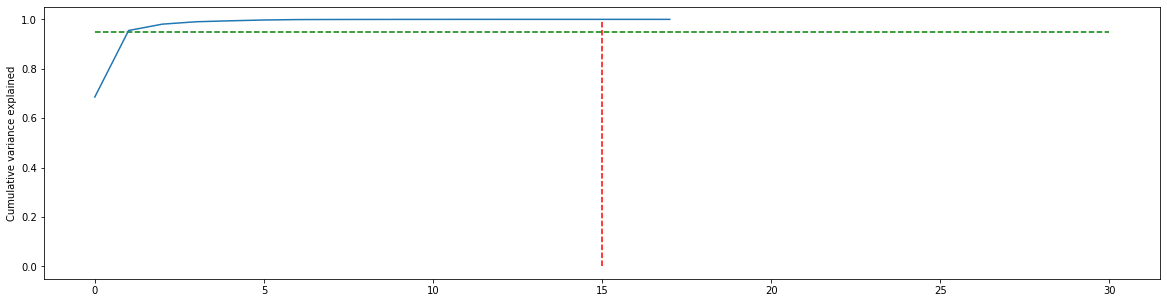

In [50]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[20,5])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [51]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=15)

X_train_pca = pca_final.fit_transform(X_scaled)


In [52]:
X_train_pca = pd.DataFrame(X_train_pca)

In [53]:
kmeans = KMeans(n_clusters = 2).fit(X_train_pca)
print(kmeans)

KMeans(n_clusters=2)


In [54]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
X_train_pca['cluster_id'] = kmeans.labels_ ##assigning labels as cluster ids to the dataframe
X_train_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,cluster_id
0,-3.261042,0.439059,-1.606381,-0.277179,0.207640,0.653717,0.401029,0.134673,-0.075517,-0.141004,-0.117171,-0.047924,-0.010600,-0.045690,0.023675,0
1,-2.076078,-0.156114,-1.879339,-2.306095,-0.014577,1.312335,0.780797,0.236960,-0.095660,-0.203396,-0.385990,-0.139189,-0.133149,-0.050909,0.032069,0
2,-1.536160,-0.441669,-1.831396,-2.660308,0.073248,1.500180,0.843967,0.238936,-0.132355,-0.227336,-0.439781,-0.182384,-0.174325,-0.028845,0.032678,0
3,-1.073023,-0.707102,-1.890940,-2.976048,-0.086675,1.132586,0.377554,0.094559,-0.047739,0.185095,0.017085,-0.111240,0.037998,-0.028726,-0.012746,1
4,-0.738530,-0.803996,-1.757116,-2.860256,-0.043127,1.071238,0.352411,0.091621,-0.080140,0.145956,-0.000517,-0.114910,0.014786,-0.022522,0.003611,1


In [56]:
Mean['pca'] = X_train_pca['cluster_id']

In [57]:
precision_score(Mean['pca'], Mean['stable'])

0.6640211640211641

### adding the cluster to the main dataset 

In [58]:
cp_cluster = pd.concat([df_cp,Mean['pca']], axis = 1)
cp_cluster1 = cp_cluster[cp_cluster['pca'] == 1]
cp_cluster0 = cp_cluster[cp_cluster['pca'] == 0]

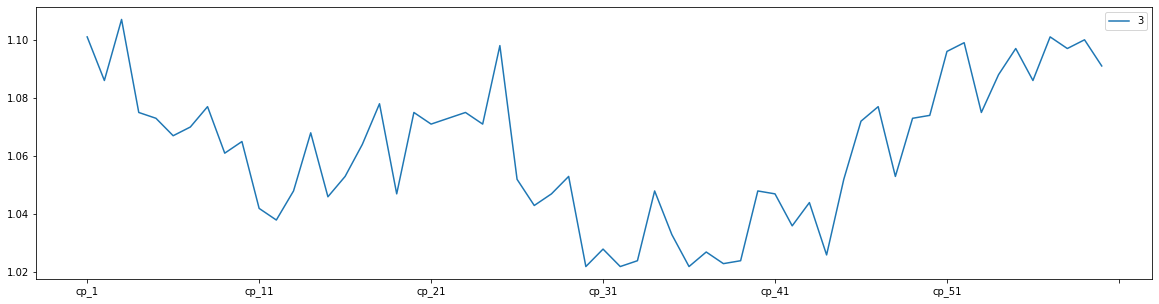

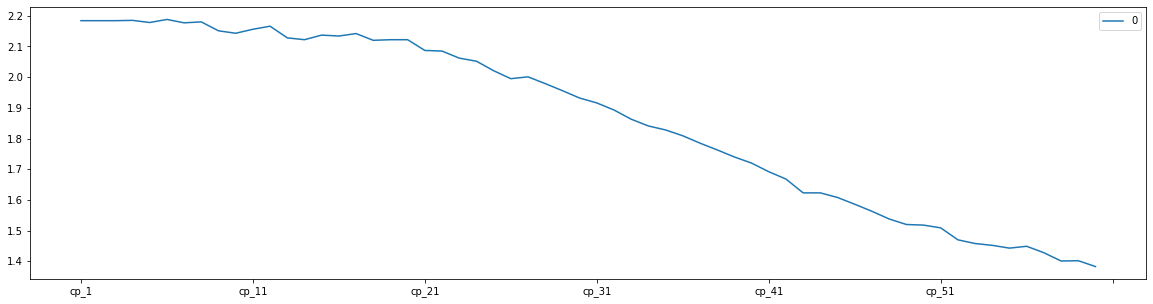

In [59]:
cp_cluster1.drop(['pca'], axis = 1).iloc[0:1].T.plot(figsize = (20,5))
cp_cluster0.drop(['pca'], axis = 1).iloc[0:1].T.plot(figsize = (20,5))


In [60]:
def clusterplots(sensordf):
    sen_cluster = pd.concat([sensordf,Mean['pca']], axis = 1)
    sen_cluster1 = sen_cluster[sen_cluster['pca'] == 1]
    sen_cluster0 = sen_cluster[sen_cluster['pca'] == 0]
    
    sen_cluster1.drop(['pca'], axis = 1).iloc[0:1].T.plot(figsize = (20,2))
    sen_cluster0.drop(['pca'], axis = 1).iloc[0:1].T.plot(figsize = (20,2))


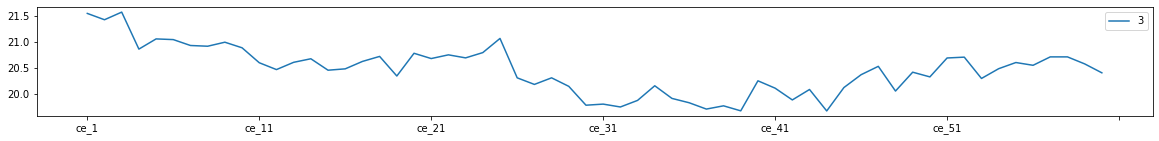

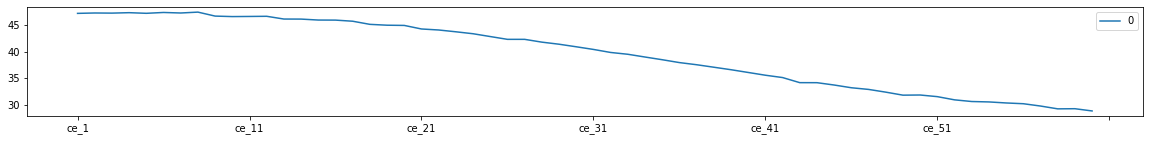

In [61]:
clusterplots(df_ce)

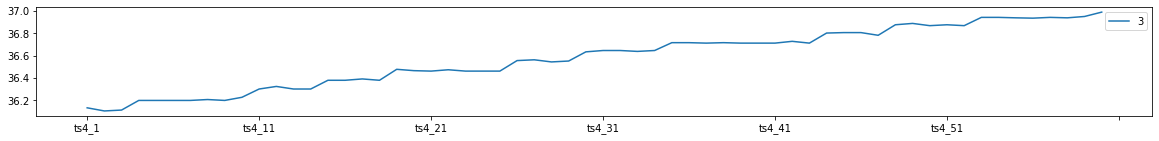

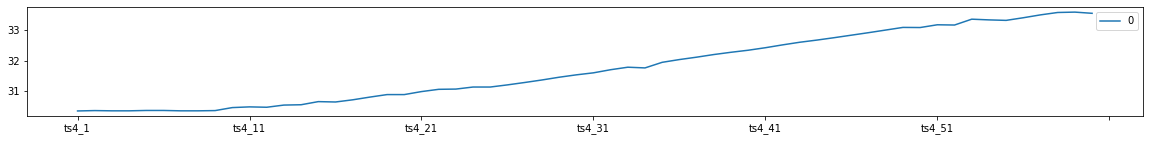

In [62]:
clusterplots(df_ts4)

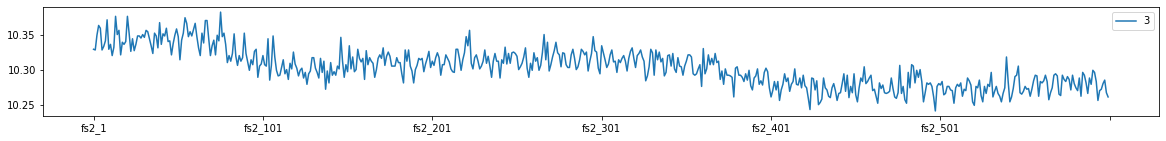

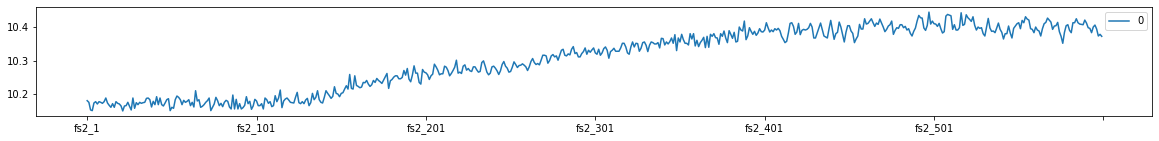

In [63]:
clusterplots(df_fs2)

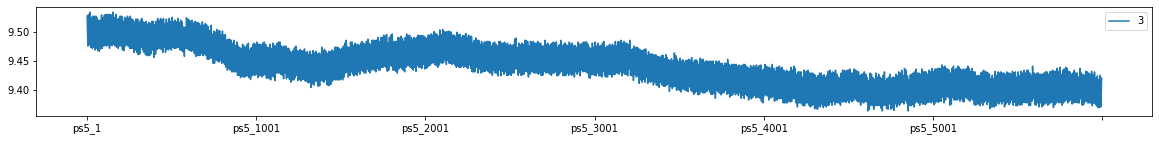

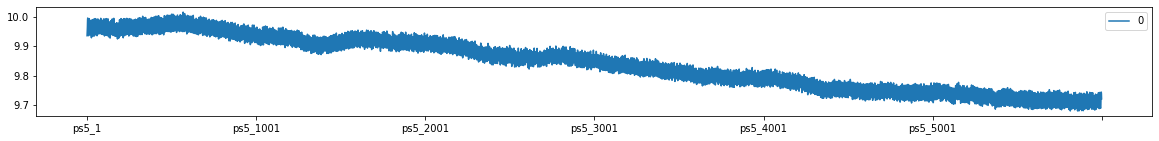

In [64]:
clusterplots(df_ps5)

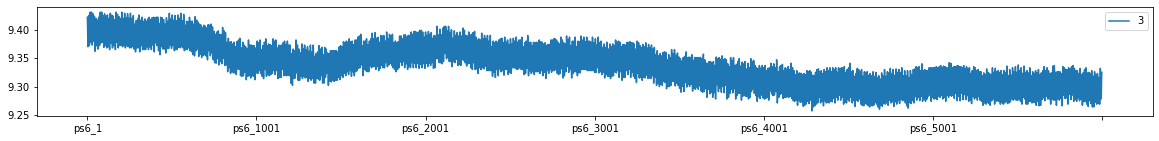

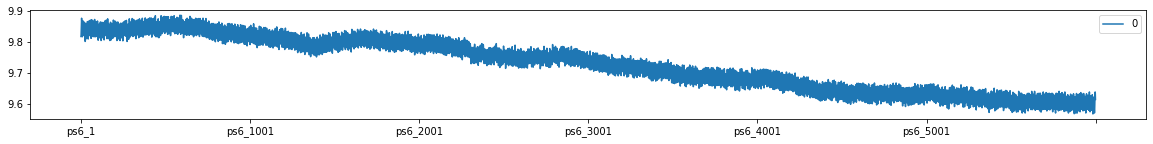

In [65]:
clusterplots(df_ps6)

In [66]:
def clusterplotstable(sensordf):
    sen_cluster = pd.concat([sensordf,profile['Stable Flag']], axis = 1)
    sen_cluster1 = sen_cluster[sen_cluster['Stable Flag'] == 1]
    sen_cluster0 = sen_cluster[sen_cluster['Stable Flag'] == 0]
    
    sen_cluster1.drop(['Stable Flag'], axis = 1).iloc[0:1].T.plot(figsize = (20,2))
    sen_cluster0.drop(['Stable Flag'], axis = 1).iloc[0:1].T.plot(figsize = (20,2))


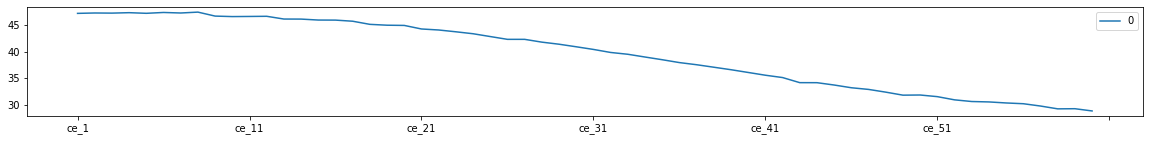

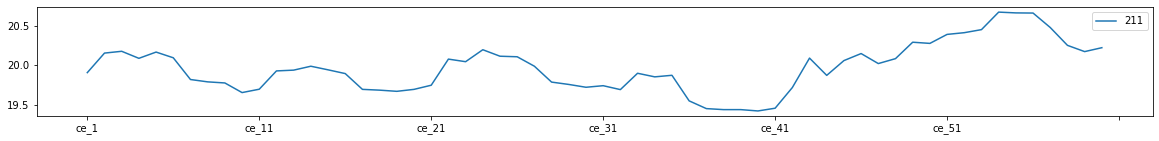

In [67]:
clusterplotstable(df_ce)

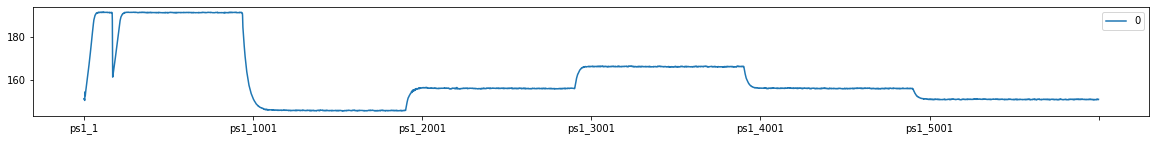

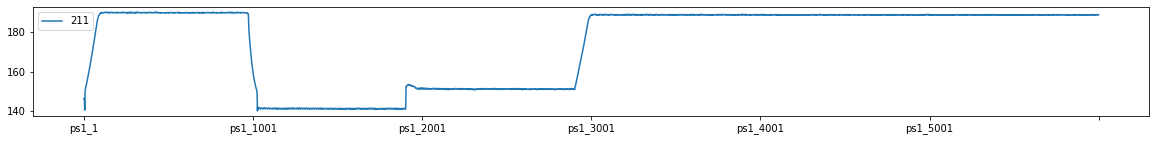

In [68]:
clusterplotstable(df_ps1)

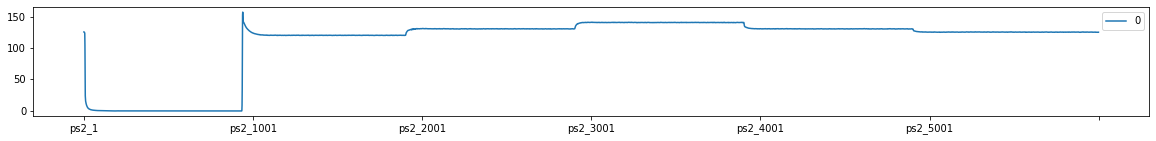

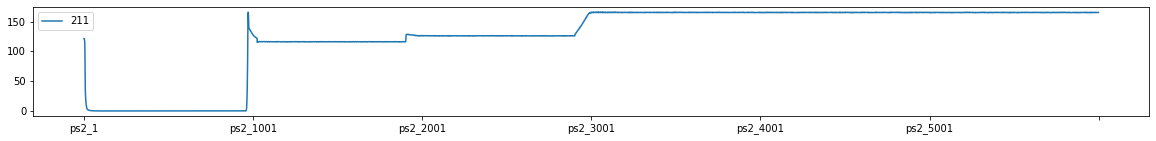

In [69]:
clusterplotstable(df_ps2)

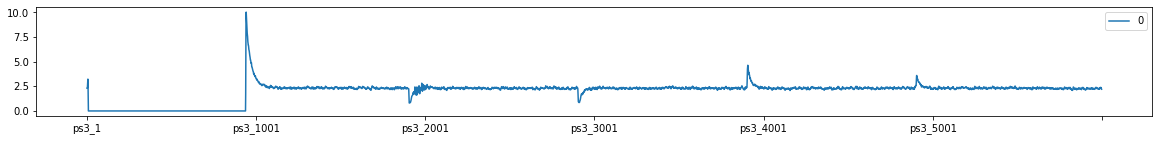

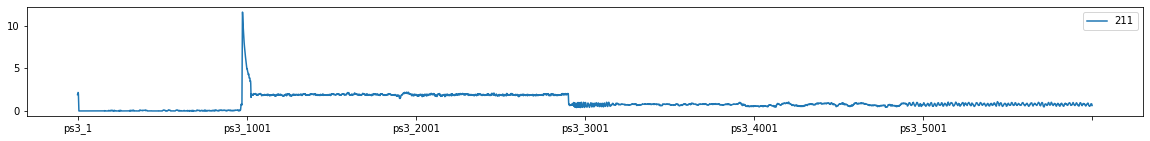

In [70]:
clusterplotstable(df_ps3)

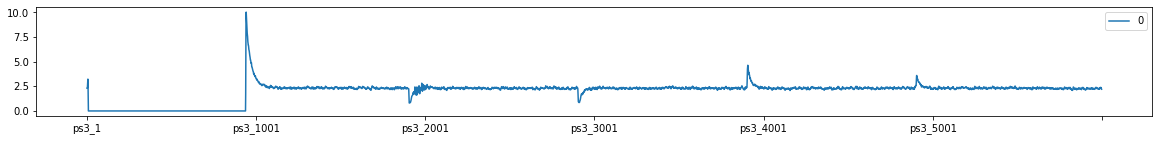

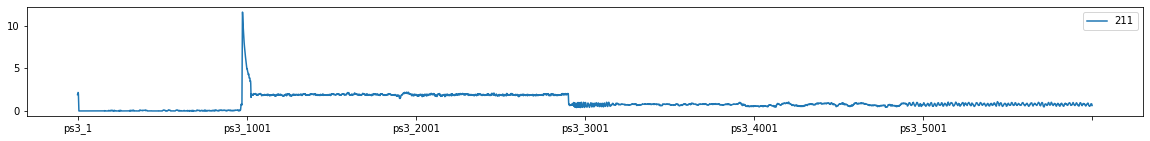

In [71]:
clusterplotstable(df_ps3)

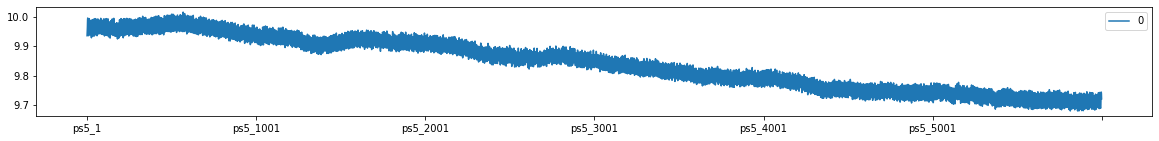

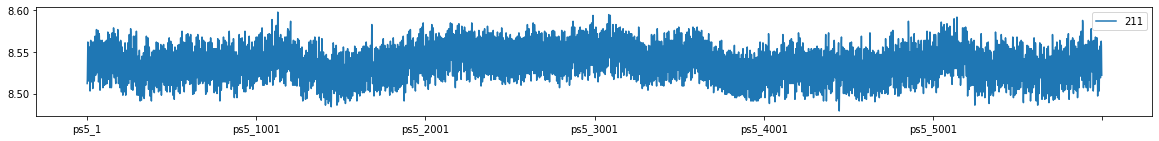

In [72]:
clusterplotstable(df_ps5)

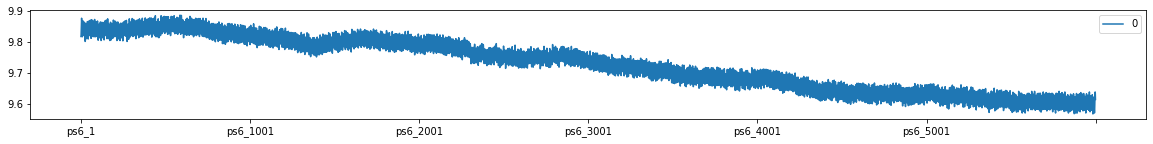

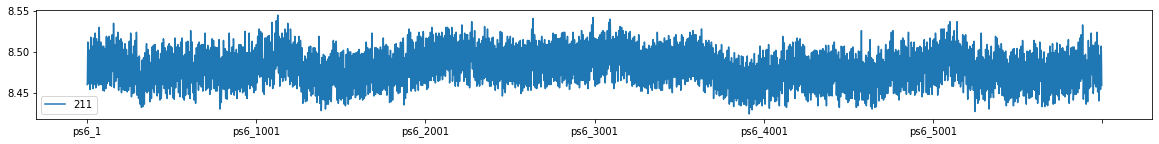

In [73]:
clusterplotstable(df_ps6)

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


cluster_id
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

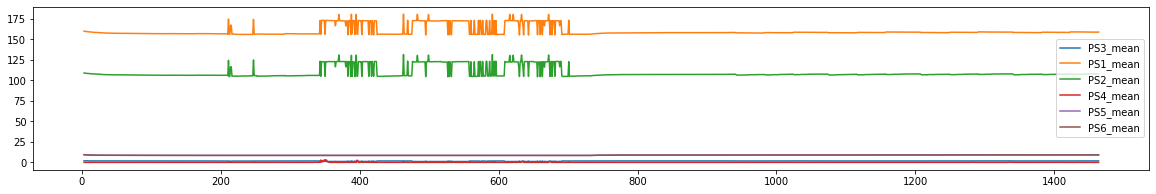

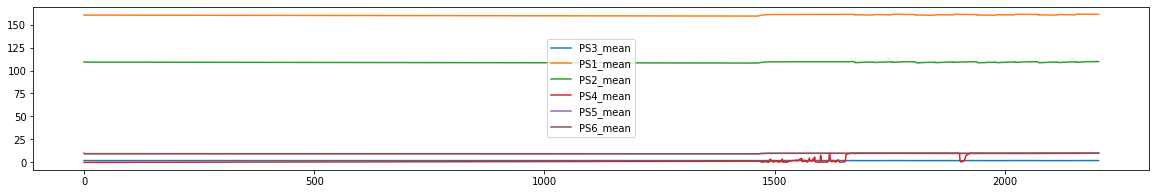

In [74]:
Mean.drop(['stable','pca'], axis = 1).groupby('cluster_id')['PS3_mean', 'PS1_mean', 'PS2_mean','PS4_mean','PS5_mean','PS6_mean'].plot(figsize = (20,3))

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


cluster_id
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

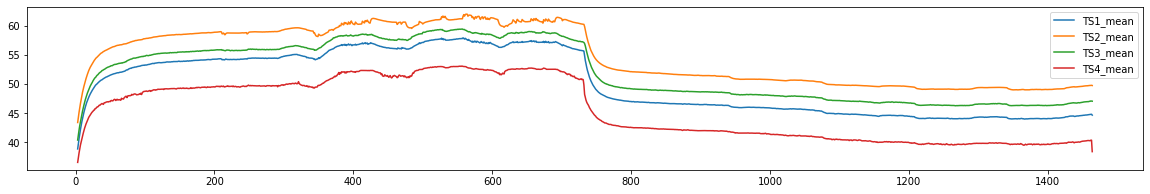

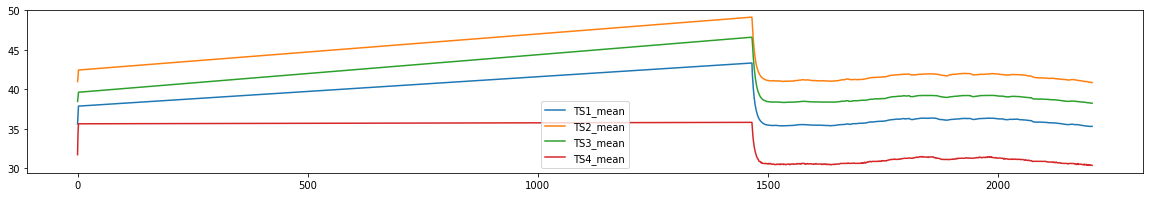

In [75]:
Mean.drop(['stable','pca'], axis = 1).groupby('cluster_id')['TS1_mean', 'TS2_mean', 'TS3_mean','TS4_mean'].plot(figsize = (20,3))

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


cluster_id
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

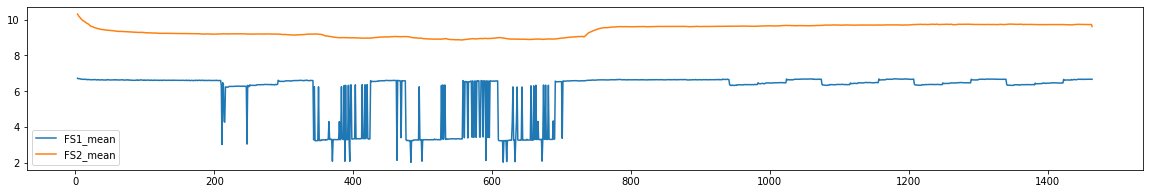

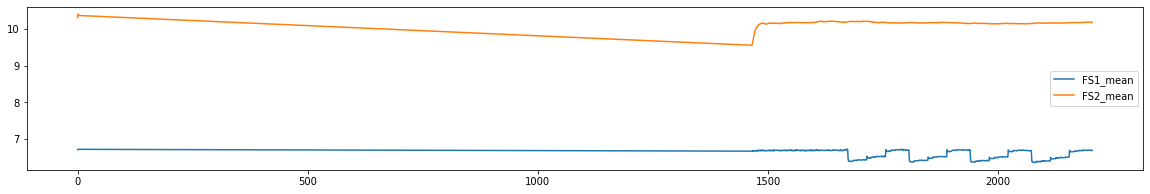

In [76]:
Mean.drop(['stable','pca'], axis = 1).groupby('cluster_id')['FS1_mean', 'FS2_mean'].plot(figsize = (20,3))

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


cluster_id
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

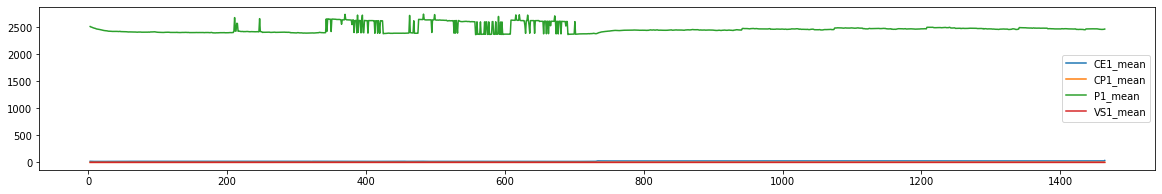

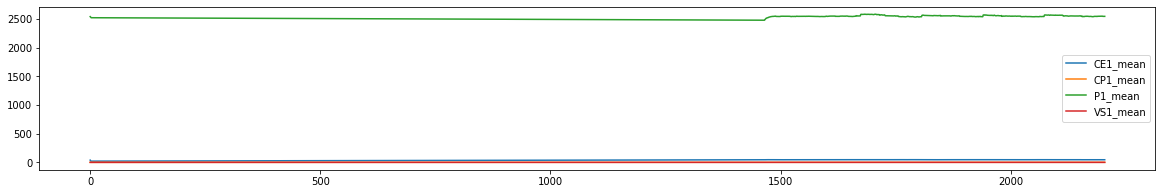

In [77]:
Mean.drop(['stable','pca'], axis = 1).groupby('cluster_id')['CE1_mean', 'CP1_mean','P1_mean', 'VS1_mean'].plot(figsize = (20,3))

In [79]:
X_scaled_new = X_scaled.drop(['cluster_id'], axis = 1)
X_scaled_new

,PS1_mean,PS2_mean,PS3_mean,PS4_mean,PS5_mean,PS6_mean,TS1_mean,TS2_mean,TS3_mean,TS4_mean,FS1_mean,FS2_mean,P1_mean,VS1_mean,CE1_mean,CP1_mean,SE1_mean
0,0.040052,0.017452,0.946011,-0.607768,1.178219,1.180667,-1.226838,-1.269472,-1.233673,-1.109099,0.495101,1.458639,0.588187,-0.603614,0.717401,0.195369,0.431929
1,0.025116,-0.005018,0.885494,-0.607768,0.818900,0.819207,-1.094802,-1.194553,-1.165493,-0.770017,0.500427,1.677960,0.487534,-0.787858,-0.476349,-1.987238,0.451847
2,-0.029286,-0.044341,0.869570,-0.607768,0.637365,0.634410,-0.944137,-1.071532,-1.077847,-0.627866,0.503533,1.595919,0.330789,-0.610530,-0.784678,-2.498861,0.475014
3,-0.063262,-0.063204,0.767727,-0.607768,0.478173,0.469669,-0.819201,-0.941500,-0.974301,-0.512727,0.505511,1.454379,0.217183,-0.731146,-0.936623,-2.682422,0.503117
4,-0.103194,-0.089956,0.672953,-0.607768,0.339211,0.329909,-0.703450,-0.815899,-0.852537,-0.408060,0.476211,1.309819,0.107563,-0.596698,-0.994760,-2.652528,0.465204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0.157982,0.080168,0.985568,1.776887,1.403618,1.403181,-1.265411,-1.283532,-1.260752,-1.274472,0.475845,1.191293,0.655674,-1.037114,1.324620,1.266003,0.418077
2201,0.153406,0.081753,0.975019,1.775823,1.393460,1.393158,-1.264432,-1.284332,-1.260889,-1.273053,0.478025,1.176268,0.648905,-1.092719,1.329917,1.233113,0.421973
2202,0.150437,0.075473,0.953797,1.775567,1.390241,1.389108,-1.264735,-1.283377,-1.263826,-1.271818,0.479086,1.172717,0.639672,-1.130066,1.311122,1.203818,0.429156
2203,0.154012,0.083037,1.007960,1.775979,1.397015,1.396499,-1.264036,-1.283361,-1.263911,-1.273294,0.470227,1.177575,0.657507,-1.266451,1.317401,1.222449,0.411123


### ISOLATION FOREST

In [80]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators = 100).fit(X_scaled_new)

In [81]:
scores = iforest.score_samples(X_scaled_new)

In [82]:
pred = iforest.predict(X_scaled_new)
X_scaled_new['anomaly']=pred

In [83]:
X_scaled_new['anomaly'].value_counts()

 1    1682
-1     523
Name: anomaly, dtype: int64

In [89]:
Mean['anomaly'] = X_scaled_new['anomaly']
Mean = Mean.replace(-1, 0)

In [94]:
print(classification_report(Mean['stable'], Mean['anomaly']))

              precision    recall  f1-score   support

           0       0.77      0.28      0.41      1449
           1       0.38      0.84      0.52       756

    accuracy                           0.47      2205
   macro avg       0.58      0.56      0.47      2205
weighted avg       0.64      0.47      0.45      2205



In [95]:
print(classification_report(Mean['stable'], Mean['cluster_id']))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66      1449
           1       0.34      0.34      0.34       756

    accuracy                           0.55      2205
   macro avg       0.50      0.50      0.50      2205
weighted avg       0.55      0.55      0.55      2205



### AUTOENCODERS

In [ ]:
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError


In [ ]:
# last column is the target
# 0 = anomaly, 1 = normal

x_train, x_test, y_train, y_test = train_test_split(Mean, profile_stable, test_size=0.2, stratify=profile_stable)



In [ ]:
# use case is novelty detection so use only the normal data
# for training
train_index = y_train[y_train == 1].index
train_data = x_train.loc[train_index]

# min max scale the input data
min_max_scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = min_max_scaler.fit_transform(train_data.copy())
x_test_scaled = min_max_scaler.transform(x_test.copy())

In [ ]:

# create a model by subclassing Model class in tensorflow
class AutoEncoder(Model):
  """
  Parameters
  ----------
  output_units: int
    Number of output units
  
  code_size: int
    Number of units in bottle neck
  """

  def __init__(self, output_units, code_size=8):
    super().__init__()
    self.encoder = Sequential([
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(code_size, activation='relu')
    ])
    self.decoder = Sequential([
      Dense(16, activation='relu'),
      Dropout(0.1),
      Dense(32, activation='relu'),
      Dropout(0.1),
      Dense(64, activation='relu'),
      Dropout(0.1),
      Dense(output_units, activation='sigmoid')
    ])
  
  def call(self, inputs):
    encoded = self.encoder(inputs)
    decoded = self.decoder(encoded)
    return decoded
  
model = AutoEncoder(output_units=x_train_scaled.shape[1])
# configurations of model
model.compile(loss='msle', metrics=['mse'], optimizer='adam')

history = model.fit(
    x_train_scaled,
    x_train_scaled,
    epochs=20,
    batch_size=512,
    validation_data=(x_test_scaled, x_test_scaled)
)

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSLE Loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
def find_threshold(model, x_train_scaled):
    reconstructions = model.predict(x_train_scaled)
  # provides losses of individual instances
    reconstruction_errors = tf.keras.losses.msle(reconstructions, x_train_scaled)
  # threshold for anomaly scores
    threshold = np.mean(reconstruction_errors.numpy()) \
      + np.std(reconstruction_errors.numpy())
    return threshold

In [ ]:
def get_predictions(model, x_test_scaled, threshold):
    predictions = model.predict(x_test_scaled)
  # provides losses of individual instances
    errors = tf.keras.losses.msle(predictions, x_test_scaled)
  # 0 = anomaly, 1 = normal
    anomaly_mask = pd.Series(errors) > threshold
    preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
    return preds

In [ ]:
import tensorflow as tf

In [ ]:
threshold = find_threshold(model, x_train_scaled)
print(f"Threshold: {threshold}")
# Threshold: 0.01001314025746261
predictions = get_predictions(model, x_test_scaled, threshold)
precision_score(predictions, y_test)
# 0.944

### DB SCAN

In [ ]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(X_scaled) # fitting the data to the object
distances,indices=nbrs.kneighbors(X_scaled) # finding the nearest neighbours

In [ ]:
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
# cluster the data into five clusters
dbscan = DBSCAN(eps = 2, min_samples = 2).fit(X_scaled) # fitting the model
labels = dbscan.labels_ # getting the labels

In [ ]:
X_scaled['db'] = labels

In [ ]:
X_scaled['db'].value_counts()

In [ ]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot

In [ ]:
model = AgglomerativeClustering(n_clusters=2)
# fit model and predict clusters
yhat = model.fit_predict(X_scaled)
# retrieve unique clusters
clusters = unique(yhat)


### Isolation forests and Local outlier

# Modeling

We will be using two unsupervised learning algorithms for anomaly detection.

####  1. ISOLATION FOREST

Isolation Forest is an unsupervised anomaly detection algorithm that uses the two properties “Few” and “Different” of anomalies to detect their existence. Since anomalies are few and different, they are more susceptible to isolation. This algorithm isolates each point in the data and splits them into outliers or inliers. This split depends on how long it takes to separate the points. If we try to separate a point which is obviously a non-outlier, it’ll have many points in its round, so that it will be really difficult to isolate. On the other hand, if the point is an outlier, it’ll be alone and we’ll find it very easily.

####  2. Local Outlier Factor

The Local Outlier Factor (LOF) algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with respect to its neighbors. It is a calculation that looks at the neighbors of a certain point to find out its density and compare this to the density of neighbour points later on. In short we can say that the density around an outlier object is significantly different from the density around its neighbors. LOF considers as outliers the samples that have a substantially lower density than their neighbors.

In [ ]:
X_scaled

In [ ]:
X_scaled_new = X_scaled.drop(['cluster_id'], axis = 1)

In [ ]:
#X_scaled_new['Stable Flag'] = profile['Stable Flag']

## isolation forests

In [ ]:
from sklearn.ensemble import IsolationForest
iforest = IsolationForest(n_estimators = 100).fit(X_scaled_new)

In [ ]:
scores = iforest.score_samples(X_scaled_new)

In [ ]:
len(scores)

In [ ]:
X_scaled_new['scores'] = scores

In [ ]:
X_scaled_new['scores'].describe()

In [ ]:
X_scaled_score = X_scaled_new.drop(['scores'], axis = 1)

In [ ]:
pred = iforest.predict(X_scaled_score)
X_scaled_score['anomaly']=pred

In [ ]:
X_scaled_score['anomaly'].value_counts()

In [ ]:
Mean['anomaly'] = X_scaled_score['anomaly']

In [ ]:
Mean

#### Split data into Inliers and Outliers

`Inliers` are values that are normal.`Outliers` are values that don't belong to normal data and they are the anomalies.

In [ ]:
inliers = X_scaled_new[X_scaled_new['Stable Flag']==0]
ins = inliers.drop(['Stable Flag'], axis=1)

outliers = X_scaled_new[X_scaled_new['Stable Flag']==1]
outs = outliers.drop(['Stable Flag'], axis=1)

ins.shape, outs.shape

In [ ]:
def normal_accuracy(values):
    
    tp=list(values).count(1)
    total=values.shape[0]
    accuracy=np.round(tp/total,4)
    
    return accuracy

def fraud_accuracy(values):
    
    tn=list(values).count(-1)
    total=values.shape[0]
    accuracy=np.round(tn/total,4)
    
    return accuracy

In [ ]:
#for modeling
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest


In [ ]:
state= 42

ISF = IsolationForest(random_state=state)
ISF.fit(ins)

normal_isf = ISF.predict(ins)
fraud_isf = ISF.predict(outs)

in_accuracy_isf = normal_accuracy(normal_isf)
out_accuracy_isf=fraud_accuracy(fraud_isf)
print("Accuracy in Detecting Stable Cases:", in_accuracy_isf)
print("Accuracy in Detecting Not stable Cases:", out_accuracy_isf)

In [ ]:
LOF = LocalOutlierFactor(novelty=True)
LOF.fit(ins)

normal_lof = LOF.predict(ins)
fraud_lof = LOF.predict(outs)

in_accuracy_lof = normal_accuracy(normal_lof)
out_accuracy_lof = fraud_accuracy(fraud_lof)
print("Accuracy in Detecting Stable Cases:", in_accuracy_lof)
print("Accuracy in Detecting Not stable Cases:", out_accuracy_lof)

In [ ]:
fig, (ax1,ax2)= plt.subplots(1,2, figsize=[15,2])

ax1.set_title("Accuracy of Isolation Forest",fontsize=20)
sns.barplot(x=[in_accuracy_isf,out_accuracy_isf], 
            y=['Stable', 'Not Stable'],
            label="classifiers", 
            color="b", 
            ax=ax1)
ax1.set(xlim=(0,1))

ax2.set_title("Accuracy of Local Outlier Factor",fontsize=20)
sns.barplot(x=[in_accuracy_lof,out_accuracy_lof], 
            y=['Stable', 'Not Stable'], 
            label="classifiers", 
            color="r", 
            ax=ax2)
ax2.set(xlim=(0,1))
plt.show()